In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import h5py

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# 모든 FutureWarning 무시
warnings.simplefilter(action='ignore', category=FutureWarning)

2025-05-06 09:01:09.320328: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-06 09:01:09.340005: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746522069.357756     400 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746522069.363301     400 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-06 09:01:09.383159: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
def load_data(filename):
    images, images_test = list(), list()
    spots, spots_test = list(), list()
    with h5py.File(filename, "r") as h5file:
        train_images = h5file["images/Train"]
        train_spots = h5file["spots/Train"]
    
        num_train_slides = len(train_images)
        for i, slide_name in enumerate(train_images.keys()):
            image = np.array(train_images[slide_name])
            p1 = 2000 - image.shape[0]
            p2 = 2000 - image.shape[1]
            images.append(
                np.pad(image, [(0, p1), (0, p2), (0, 0)], 'edge')
            )
            spots.append(pd.DataFrame(np.array(train_spots[slide_name])).assign(slide = i))
    

        test_images = h5file["images/Test"]
        test_spots = h5file["spots/Test"]
        sample = 'S_7'
        image = np.array(test_images[sample])
        p1 = 2000 - image.shape[0]
        p2 = 2000 - image.shape[1]
        images_test.append(np.pad(image, [(0, p1), (0, p2), (0, 0)], 'edge'))
        spots_test.append(pd.DataFrame(np.array(test_spots[sample])).assign(slide = 0))
        
    images = tf.constant(images)
    df_spots = pd.concat(spots)
    images_test = tf.constant(images_test)
    df_spots_test = pd.concat(spots_test)
    return images, df_spots, images_test, df_spots_test

images, df_spots, images_test, df_spots_test = load_data("data/elucidata_ai_challenge_data.h5")
targets = [i for i in df_spots.columns if i.startswith('C')]

2025-05-06 09:01:13.928043: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1746522073.928115     400 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5520 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [3]:
df_spots[targets].describe().T

,count,mean,std,min,25%,50%,75%,max
C1,8349.0,1.315875,2.955853,1.054997e-05,0.016408,0.069853,0.812378,29.454552
C2,8349.0,0.127599,0.172966,2.605745e-04,0.028648,0.070915,0.156029,2.314705
C3,8349.0,0.910304,2.055712,8.250343e-05,0.020510,0.067104,0.530473,16.949463
C4,8349.0,0.507307,1.182995,1.634036e-07,0.000365,0.004581,0.271903,9.771889
C5,8349.0,1.057699,1.837263,9.356235e-07,0.006655,0.288817,1.140192,15.887546
C6,8349.0,0.166975,0.440006,4.976576e-08,0.000185,0.002065,0.063669,6.475006
C7,8349.0,0.050874,0.071590,4.824552e-06,0.006909,0.022202,0.064301,0.675966
C8,8349.0,0.016369,0.075231,8.606437e-08,0.000140,0.000993,0.006877,2.452402
C9,8349.0,0.392858,1.025171,1.917478e-07,0.000229,0.007151,0.192796,16.392470
C10,8349.0,0.076121,0.273761,5.944855e-10,0.000031,0.000496,0.017494,4.728983


In [4]:
df_spots[targets].std().sort_values()

C13    0.042353
C7     0.071590
C8     0.075231
C34    0.075631
C28    0.081246
C22    0.087373
C35    0.093024
C33    0.103222
C12    0.107853
C32    0.124662
C21    0.126470
C14    0.149814
C31    0.156569
C19    0.169072
C26    0.170758
C2     0.172966
C23    0.182370
C20    0.226541
C30    0.257142
C29    0.266422
C18    0.271831
C10    0.273761
C24    0.347821
C11    0.405856
C6     0.440006
C17    0.543905
C25    0.603360
C27    0.688565
C15    0.770452
C9     1.025171
C4     1.182995
C5     1.837263
C3     2.055712
C1     2.955853
C16    5.265192
dtype: float64

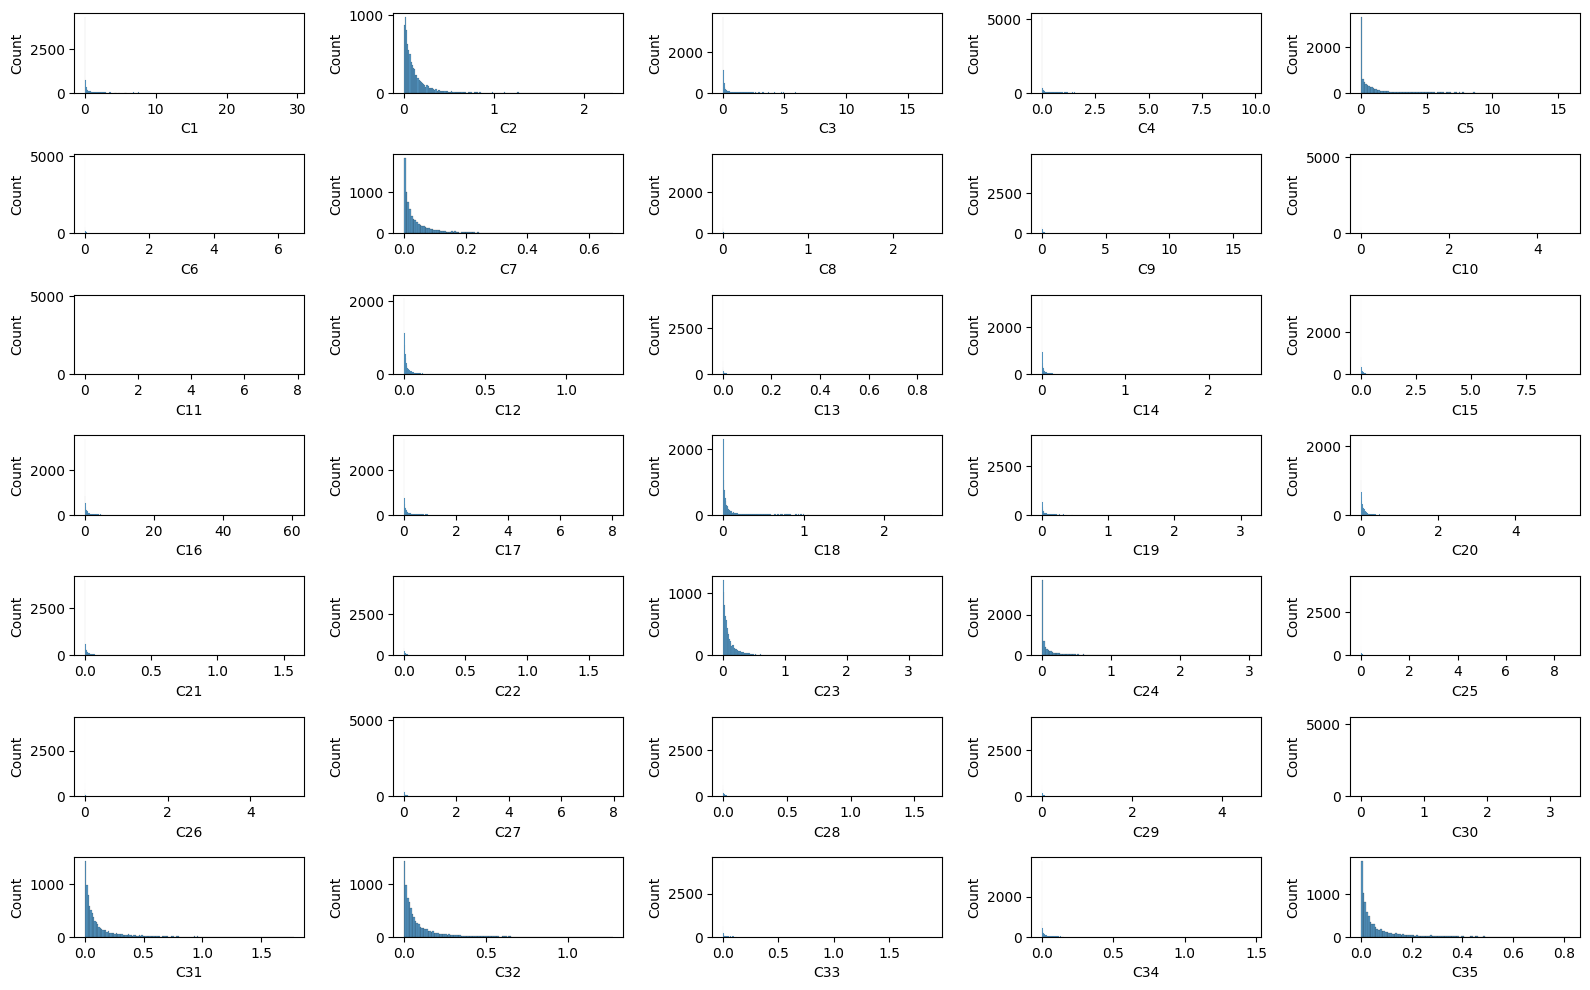

In [5]:
fig, axes = plt.subplots(7, 5, figsize = (16, 10))
for i, ax in zip(targets, axes.flatten()):
    sns.histplot(df_spots, x = i, ax = ax)
plt.tight_layout()
plt.show()

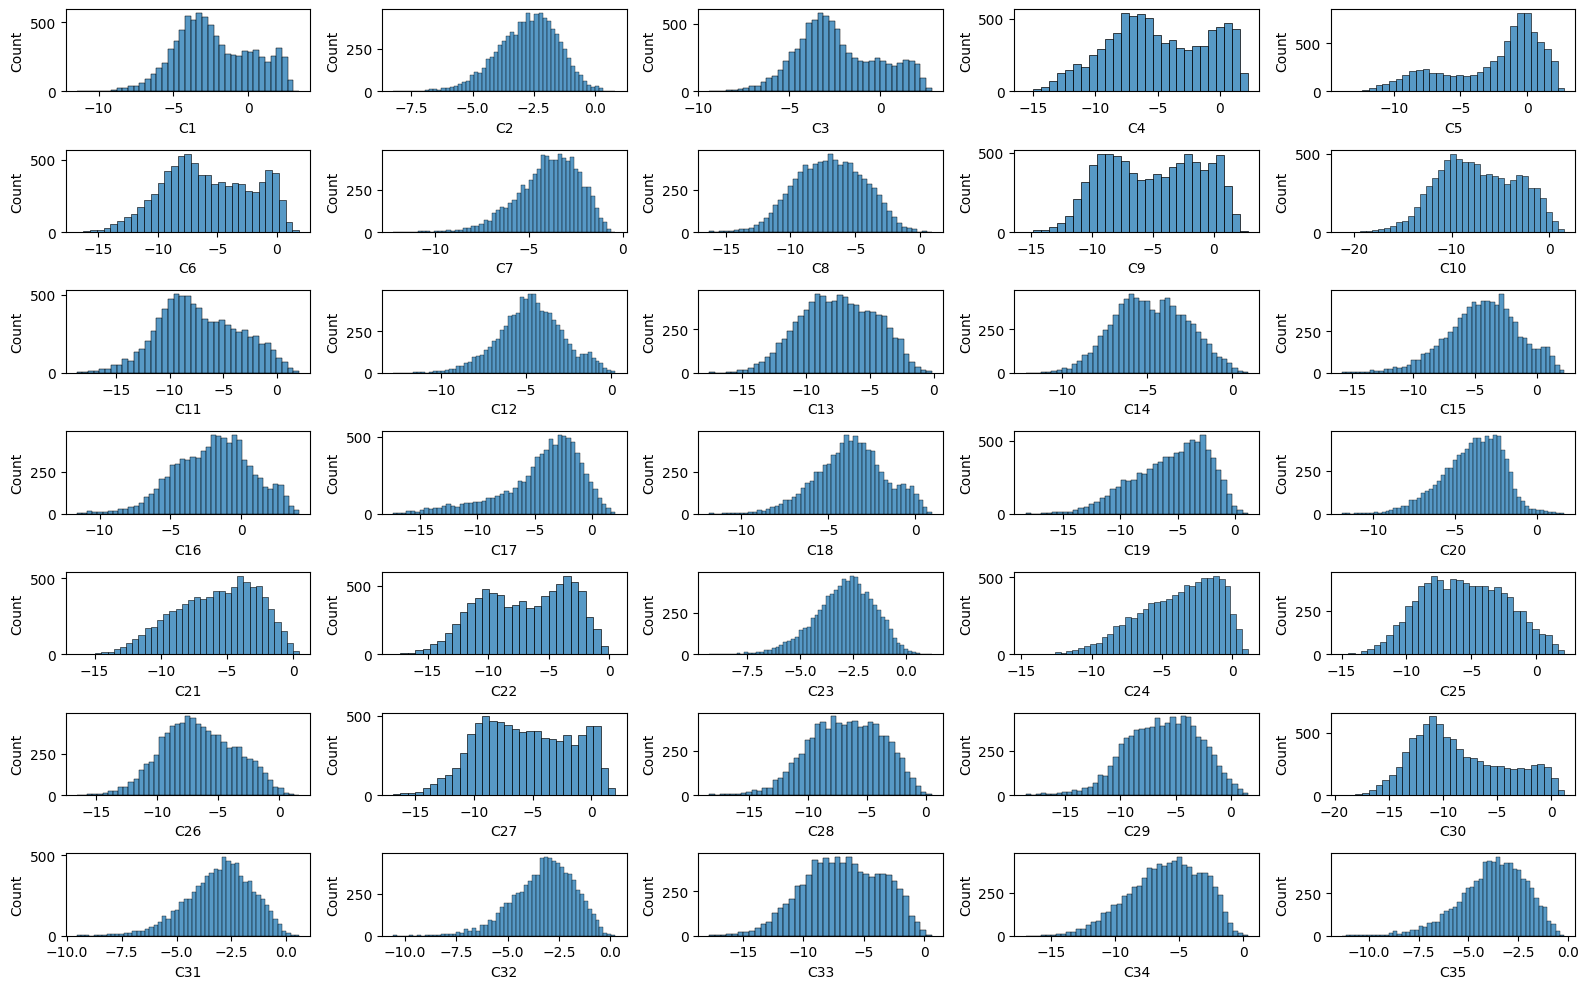

In [6]:
fig, axes = plt.subplots(7, 5, figsize = (16, 10))
for i, ax in zip(targets, axes.flatten()):
    sns.histplot(x = np.log(df_spots[i]), ax = ax)
plt.tight_layout()
plt.show()

In [7]:
np.log(df_spots[targets]).std().sort_values()

C2     1.257504
C23    1.410427
C31    1.480825
C32    1.486195
C7     1.654106
C35    1.659330
C20    1.839499
C12    1.891744
C18    1.989418
C14    2.135892
C3     2.264935
C1     2.572806
C8     2.664255
C16    2.671740
C24    2.794466
C34    2.806590
C15    2.945959
C13    2.946209
C26    2.981018
C28    3.084750
C21    3.094334
C19    3.193447
C33    3.237917
C29    3.242636
C25    3.262344
C17    3.444126
C5     3.557018
C22    3.664482
C6     3.727915
C11    3.759918
C9     3.890528
C27    3.940798
C10    4.039928
C4     4.053365
C30    4.259399
dtype: float64

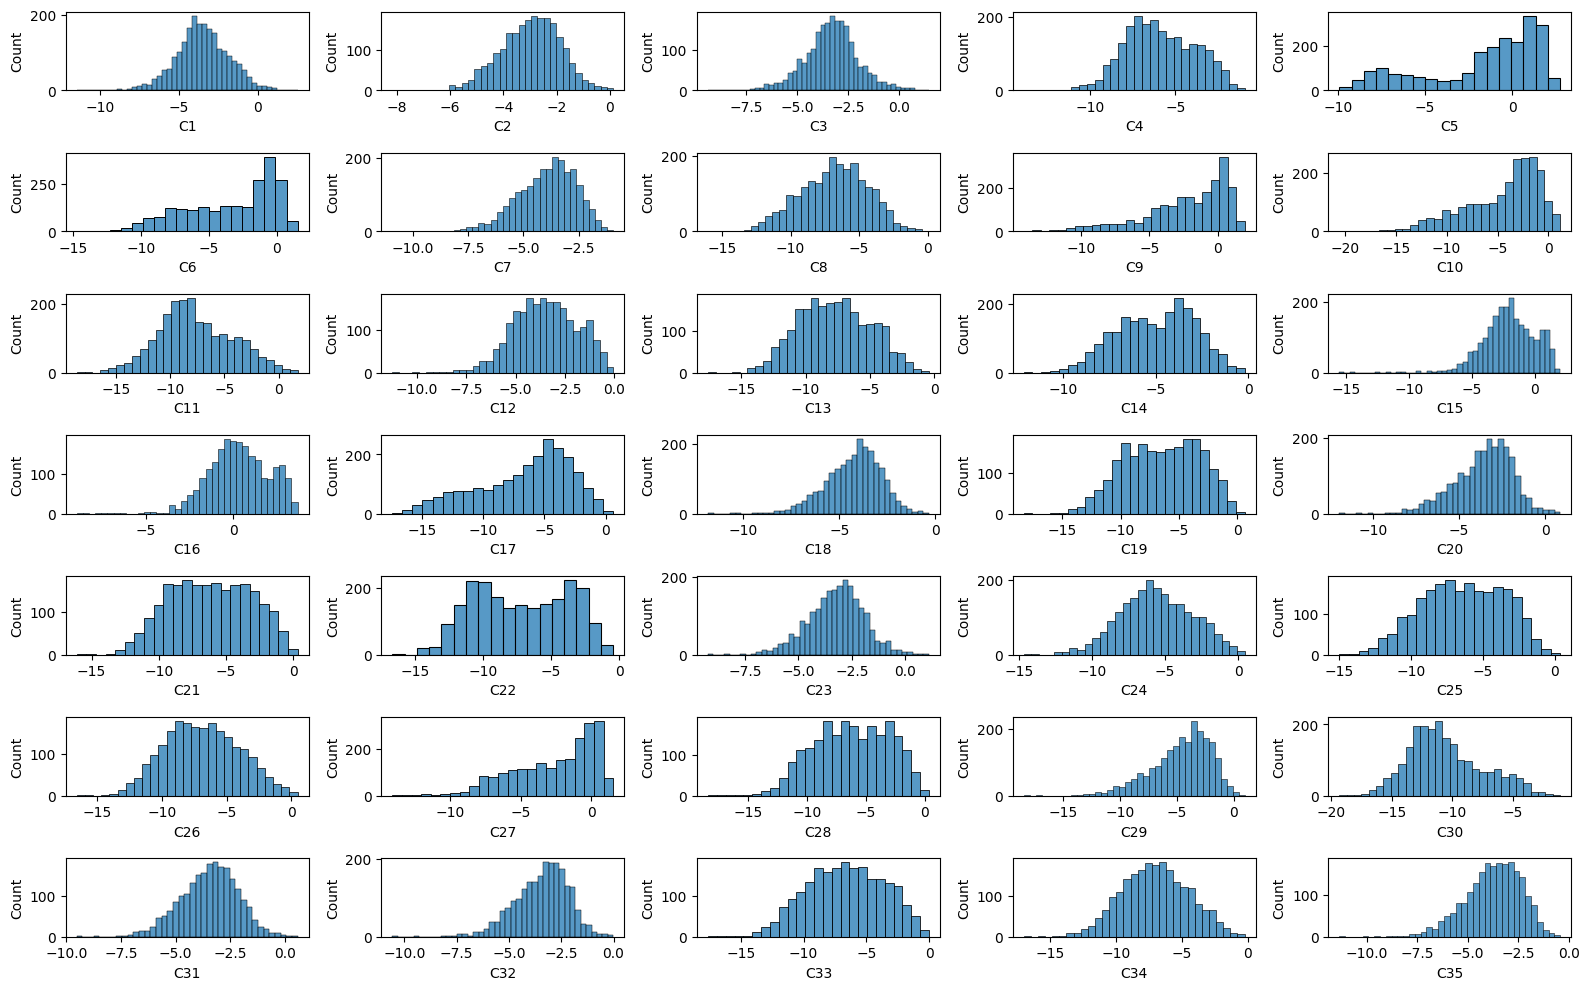

In [8]:
fig, axes = plt.subplots(7, 5, figsize = (16, 10))
for i, ax in zip(targets, axes.flatten()):
    sns.histplot(x = np.log(df_spots.loc[df_spots['slide'] == 0, i]), ax = ax)
plt.tight_layout()
plt.show()

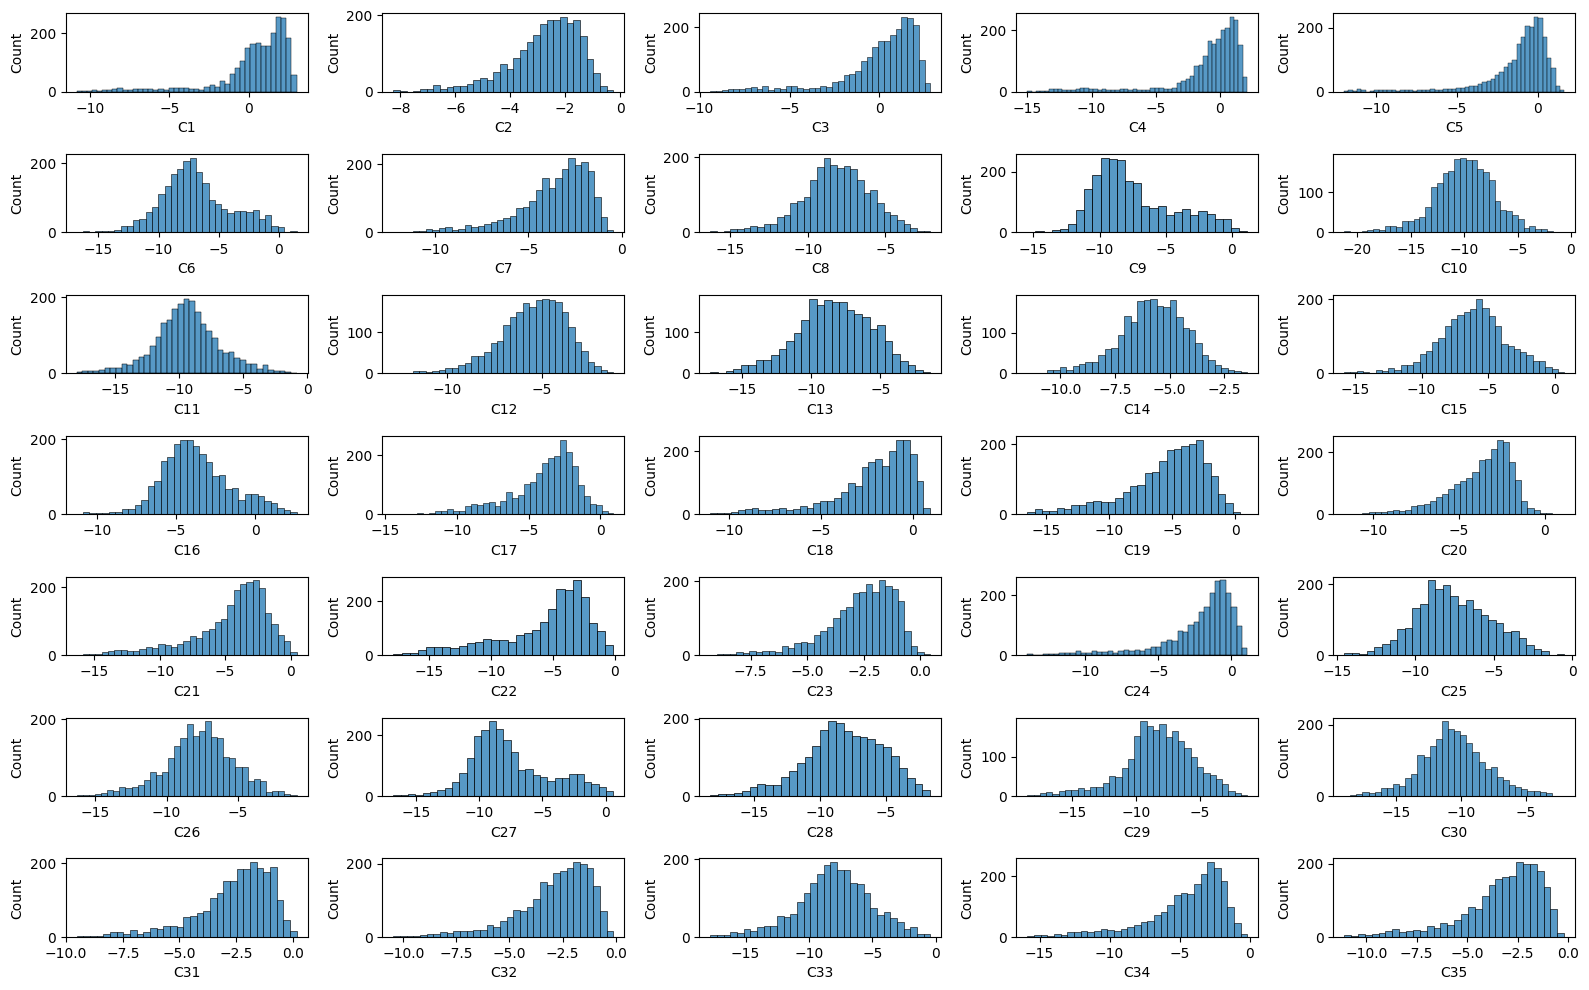

In [9]:
fig, axes = plt.subplots(7, 5, figsize = (16, 10))
for i, ax in zip(targets, axes.flatten()):
    sns.histplot(x = np.log(df_spots.loc[df_spots['slide'] == 1, i]), ax = ax)
plt.tight_layout()
plt.show()

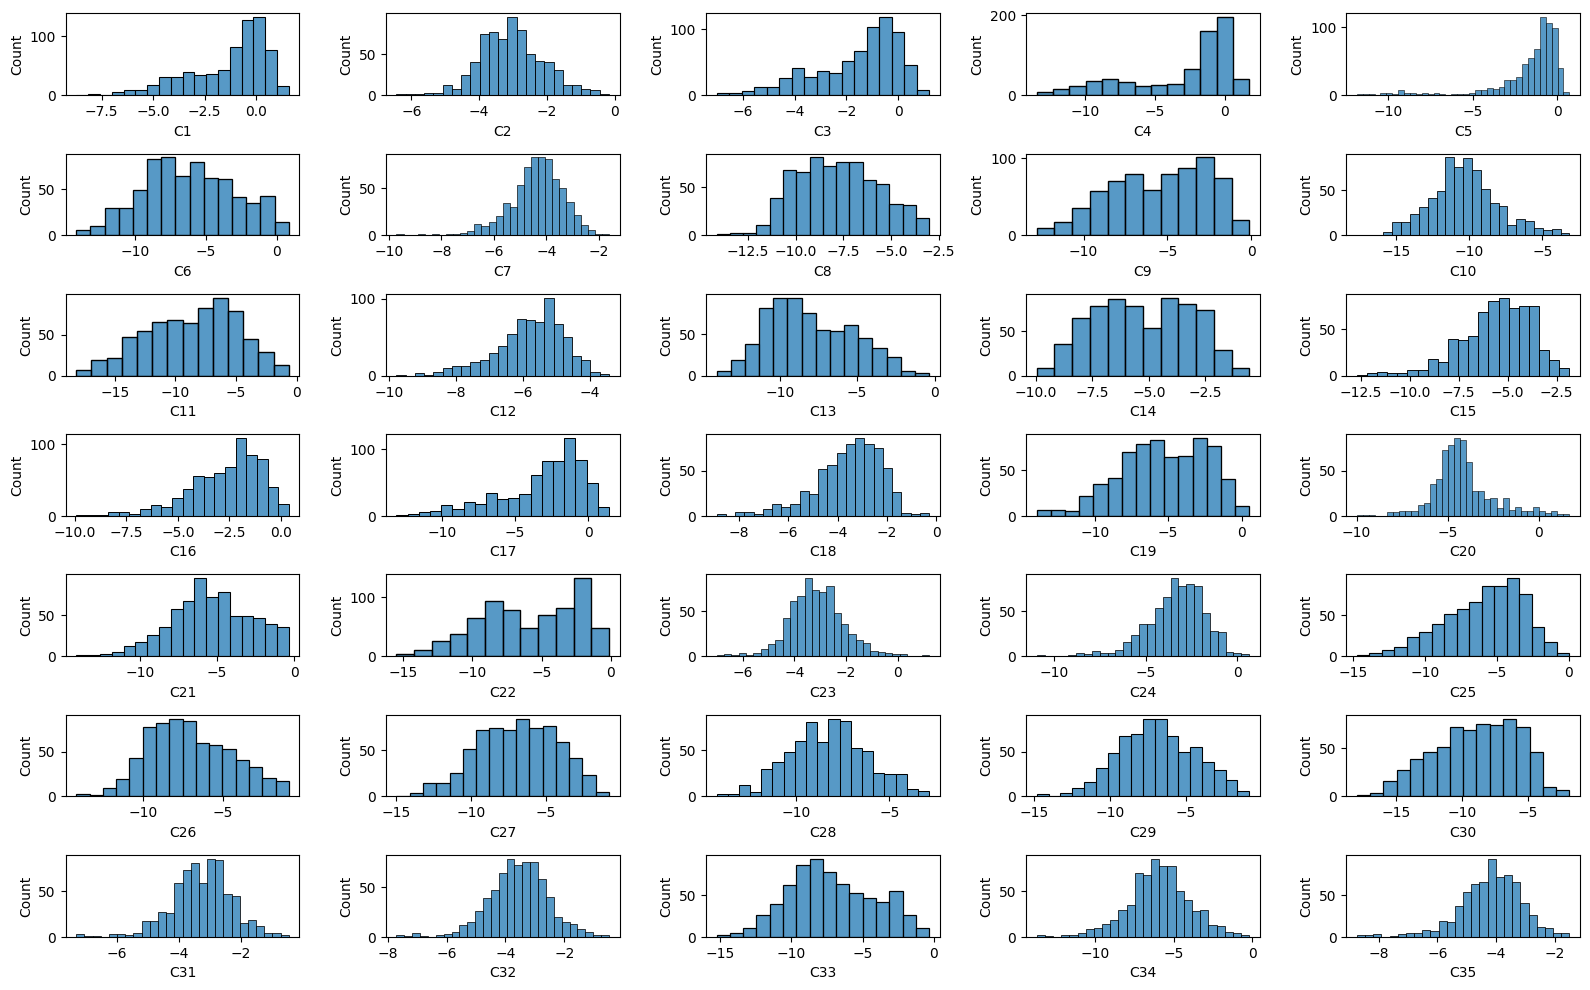

In [10]:
fig, axes = plt.subplots(7, 5, figsize = (16, 10))
for i, ax in zip(targets, axes.flatten()):
    sns.histplot(x = np.log(df_spots.loc[df_spots['slide'] == 2, i]), ax = ax)
plt.tight_layout()
plt.show()

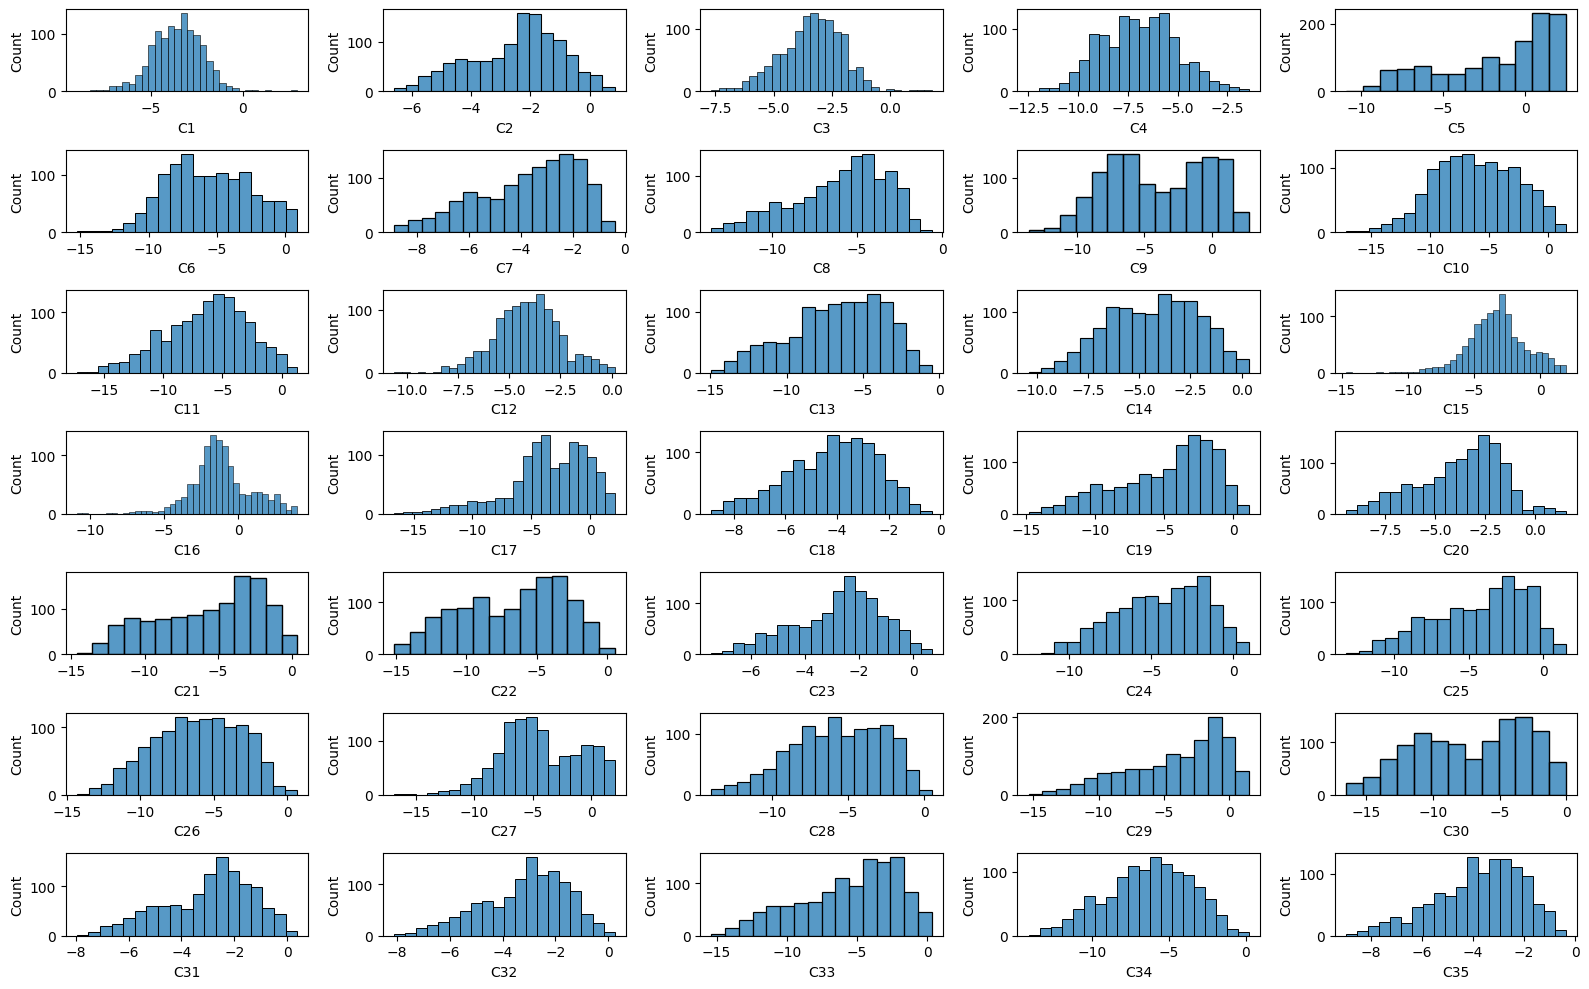

In [11]:
fig, axes = plt.subplots(7, 5, figsize = (16, 10))
for i, ax in zip(targets, axes.flatten()):
    sns.histplot(x = np.log(df_spots.loc[df_spots['slide'] == 3, i]), ax = ax)
plt.tight_layout()
plt.show()

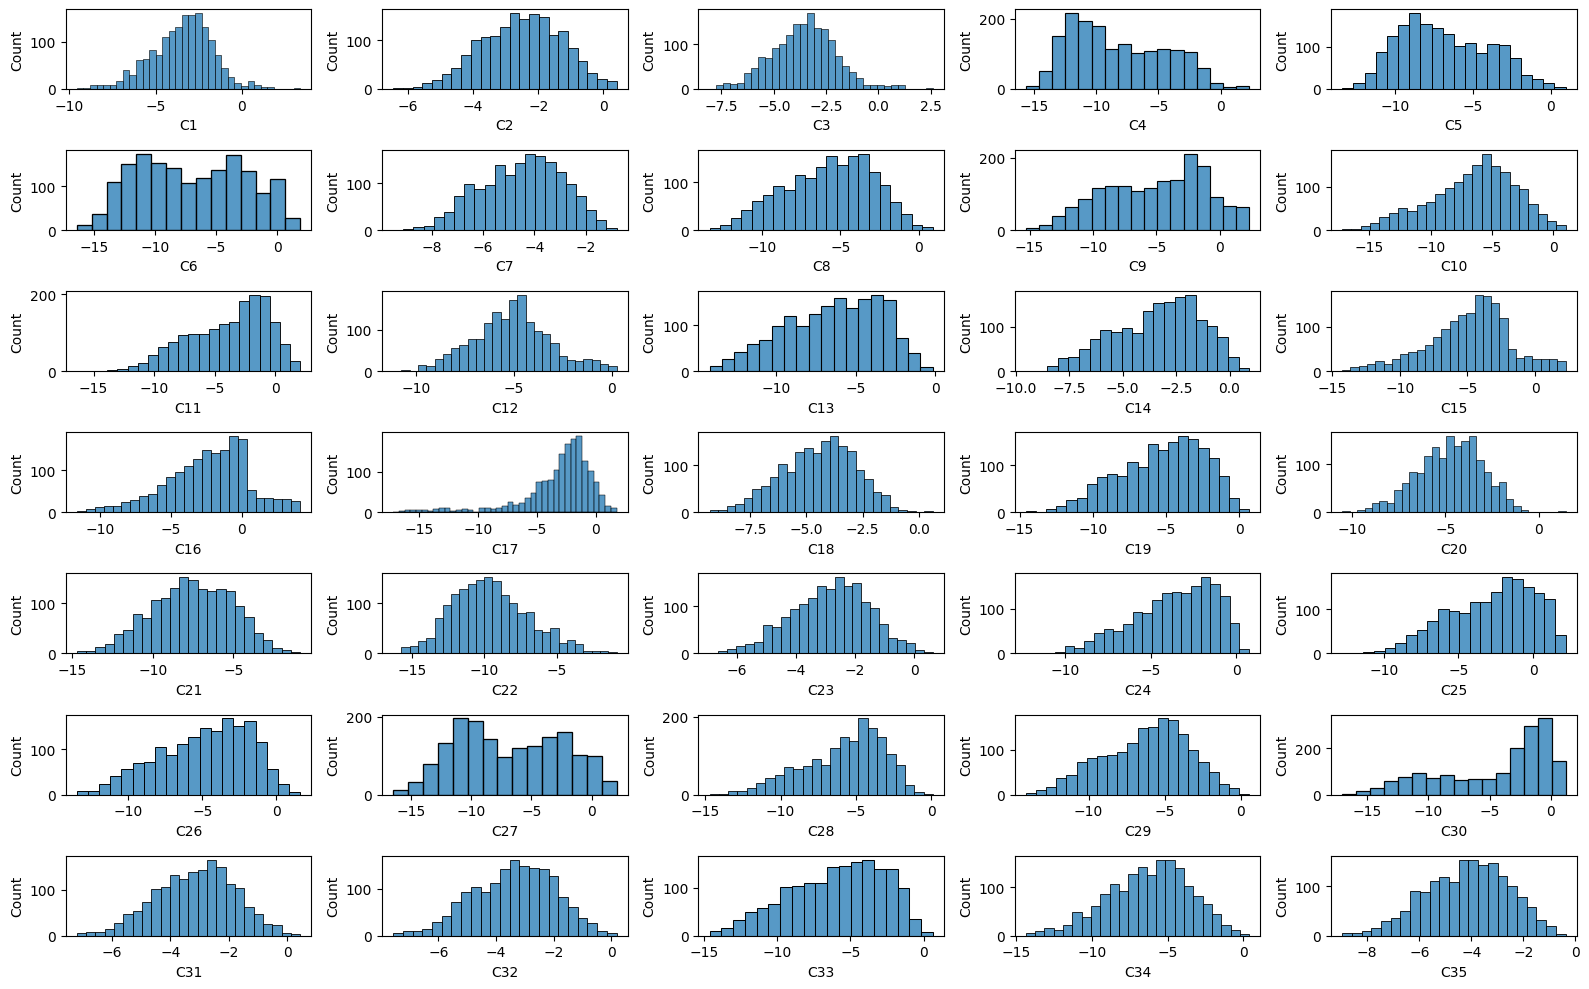

In [22]:
fig, axes = plt.subplots(7, 5, figsize = (16, 10))
for i, ax in zip(targets, axes.flatten()):
    sns.histplot(x = np.log(df_spots.loc[df_spots['slide'] == 4, i]), ax = ax)
plt.tight_layout()
plt.show()

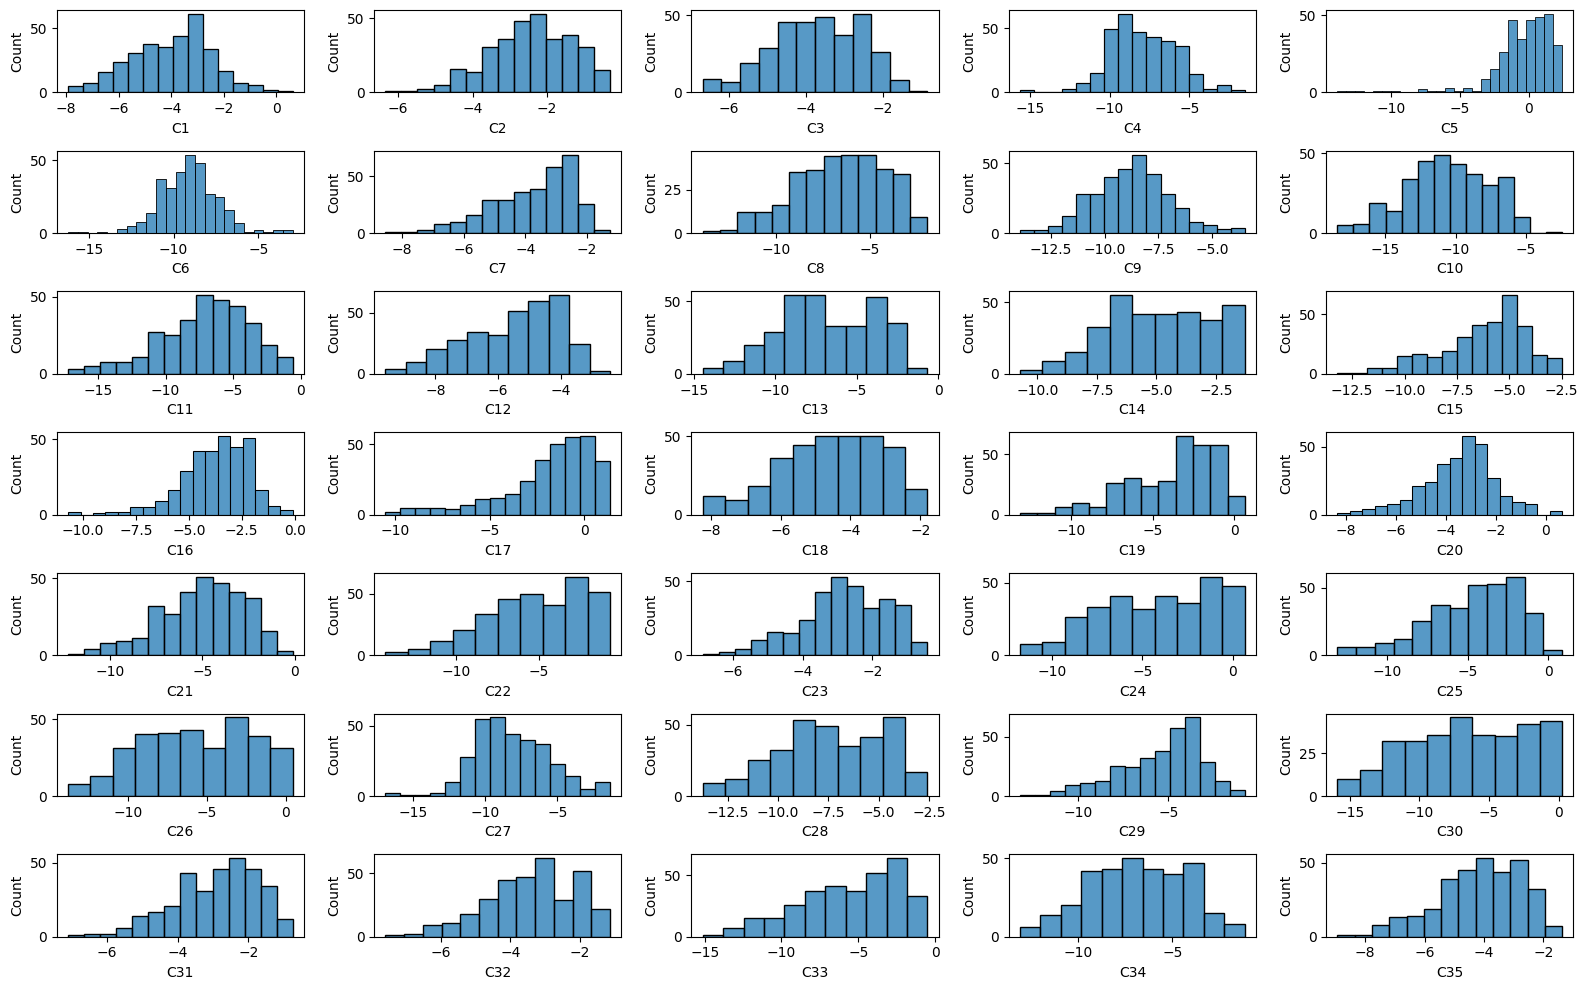

In [23]:
fig, axes = plt.subplots(7, 5, figsize = (16, 10))
for i, ax in zip(targets, axes.flatten()):
    sns.histplot(x = np.log(df_spots.loc[df_spots['slide'] == 5, i]), ax = ax)
plt.tight_layout()
plt.show()

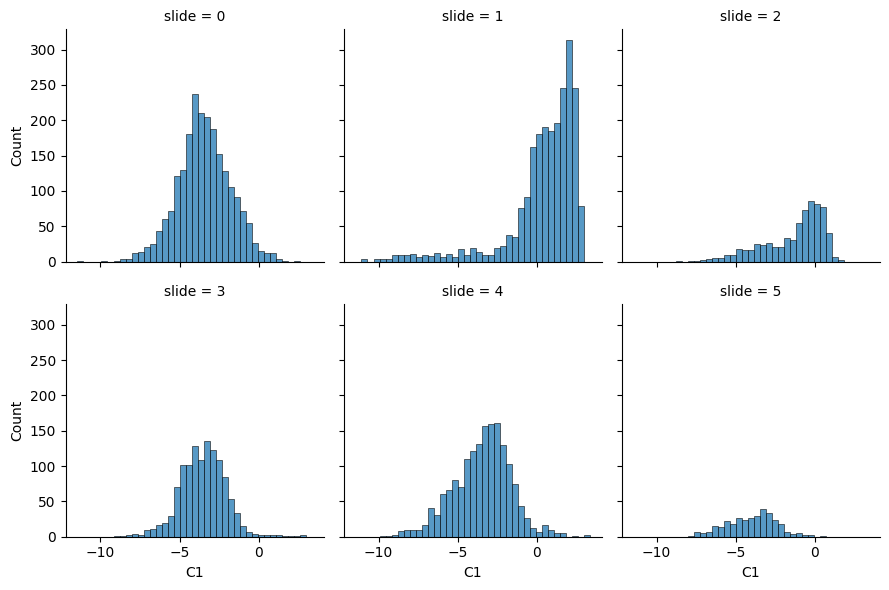

In [18]:
sns.displot(df_spots.assign(C1 = lambda x: np.log(x['C1'])), x = 'C1', col = 'slide', col_wrap=3, height = 3)
plt.show()

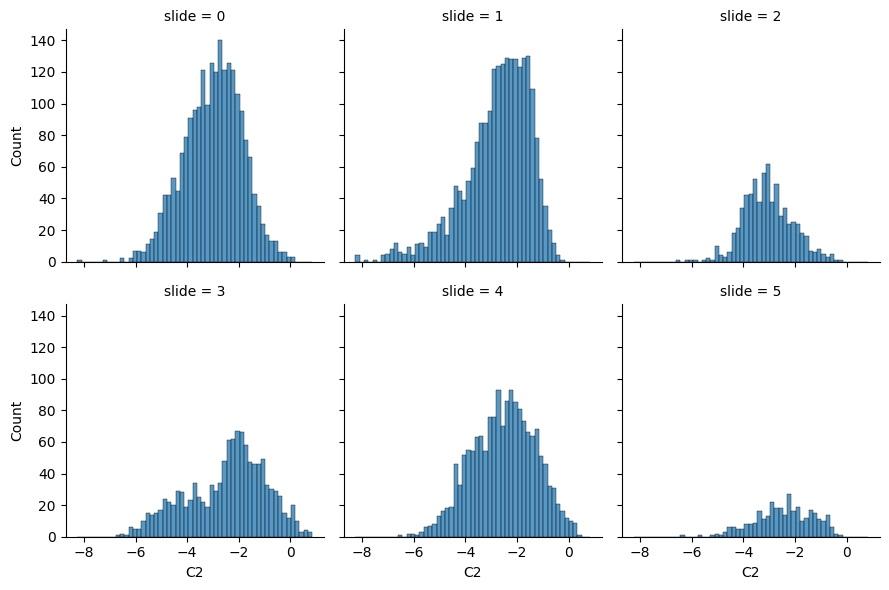

In [19]:
sns.displot(df_spots.assign(C2 = lambda x: np.log(x['C2'])), x = 'C2', col = 'slide', col_wrap=3, height = 3)
plt.show()

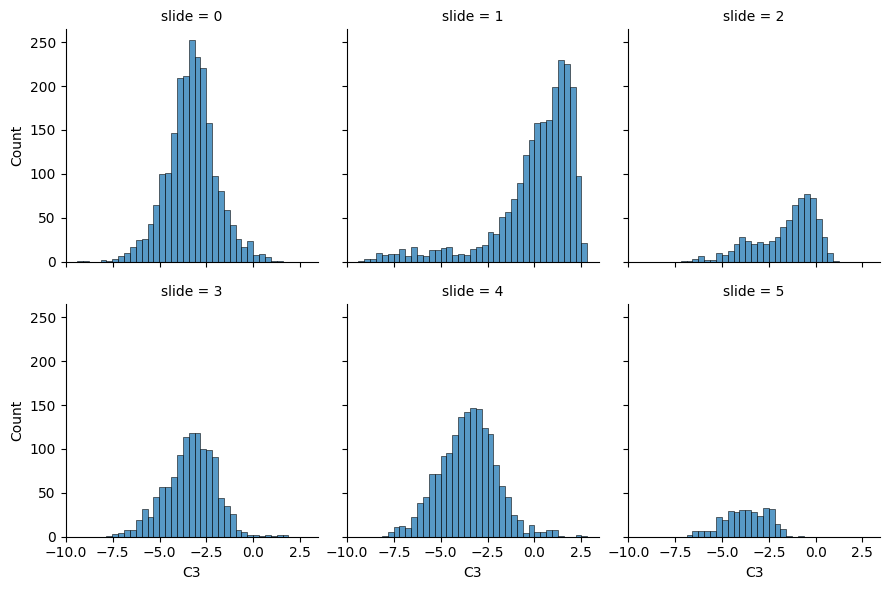

In [20]:
sns.displot(df_spots.assign(C3 = lambda x: np.log(x['C3'])), x = 'C3', col = 'slide', col_wrap=3, height = 3)
plt.show()

- slide 별 targets의 분포의 차이가 큽니다.

- targets으로 Slide를 얼마나 구분할 수 있을 지 살펴봅니다,

In [40]:
import lightgbm as lgb
from sklearn.model_selection import cross_validate, StratifiedKFold

cross_validate(
    lgb.LGBMClassifier(verbose = 0), df_spots[targets], df_spots['slide'], scoring = 'accuracy', cv = StratifiedKFold(n_splits = 5),
    return_train_score = True
)

{'fit_time': array([0.57223392, 0.56855321, 0.60955977, 0.59047556, 0.5793612 ]),
 'score_time': array([0.01551247, 0.01159024, 0.013309  , 0.01120734, 0.01263261]),
 'test_score': array([0.9       , 0.9       , 0.90778443, 0.91497006, 0.90293589]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [13]:
df_m = df_spots.groupby('slide')[targets].mean()
df_m

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35
slide,,,,,,,,,,,,,,,,,,,,,
0,0.121815,0.089254,0.093587,0.015726,1.699786,0.387921,0.037654,0.011725,0.751919,0.193413,...,0.026118,0.555403,0.042900,0.065627,0.002156,0.067414,0.062735,0.027981,0.013463,0.049265
1,4.291826,0.113044,2.972872,1.641658,0.736369,0.045590,0.074870,0.002172,0.046826,0.001683,...,0.005202,0.040083,0.005361,0.003858,0.000741,0.173707,0.135404,0.009075,0.058976,0.108704
2,0.725079,0.075951,0.466742,0.516227,0.432105,0.076716,0.019503,0.002872,0.047449,0.000630,...,0.016042,0.012360,0.001846,0.012357,0.003215,0.058641,0.046073,0.020889,0.016465,0.024181
3,0.135857,0.206737,0.093368,0.005385,2.025008,0.110981,0.078174,0.020068,0.705897,0.103831,...,0.039761,0.464360,0.052700,0.323093,0.050994,0.140262,0.112354,0.076050,0.025307,0.065912
4,0.177059,0.158723,0.118722,0.066009,0.031681,0.151110,0.030622,0.045922,0.388064,0.049421,...,0.112755,0.197721,0.023431,0.026668,0.304792,0.095392,0.079107,0.048721,0.025244,0.043664
5,0.053877,0.148292,0.043060,0.003385,2.042007,0.000755,0.044108,0.009622,0.000872,0.000694,...,0.101836,0.008181,0.005457,0.023727,0.105697,0.092254,0.063876,0.048681,0.011320,0.033918


In [14]:
from scipy.stats import spearmanr
df_spots.groupby('slide')[targets].apply(
    lambda x: x.apply(lambda y: spearmanr(y, df_m.loc[x.name])[0], axis=1).mean()
)

slide
0    0.617254
1    0.835031
2    0.662135
3    0.450661
4    0.435189
5    0.682513
dtype: float64

In [15]:
from scipy.stats import spearmanr
s_m = df_spots[targets].mean()
df_spots.groupby('slide')[targets].apply(
    lambda x: x.apply(lambda y: spearmanr(y, s_m)[0], axis=1).mean()
)

slide
0    0.433825
1    0.450022
2    0.477239
3    0.321814
4    0.260082
5    0.192276
dtype: float64

In [16]:
from scipy.stats import spearmanr
s_m = np.log(df_spots[targets]).mean()
df_spots.groupby('slide')[targets].apply(
    lambda x: x.apply(lambda y: spearmanr(y, s_m)[0], axis=1).mean()
)

slide
0    0.525132
1    0.752950
2    0.687466
3    0.491715
4    0.350776
5    0.557971
dtype: float64

In [ ]:
fig, axes = plt.subplots(7, 5, figsize = (16, 10))
for i, ax in zip(targets, axes.flatten()):
    sns.histplot(x = np.log(df_spots[i]), ax = ax)
plt.tight_layout()
plt.show()

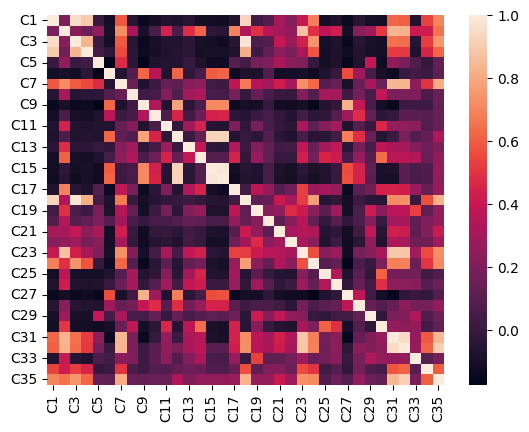

In [102]:
sns.heatmap(
    df_spots[targets].corr()
)
plt.show()

In [103]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_spots[targets])

PCA()

In [105]:
pca.explained_variance_ratio_.cumsum()

array([0.59997605, 0.87589215, 0.94406288, 0.9587159 , 0.96959785,
       0.97682391, 0.98161951, 0.98541462, 0.98854434, 0.99071653,
       0.99272638, 0.99413127, 0.99521954, 0.99612862, 0.99691124,
       0.99751865, 0.99795981, 0.99833952, 0.99868332, 0.99900519,
       0.99919032, 0.99936292, 0.99949482, 0.9995885 , 0.9996775 ,
       0.99975433, 0.99981318, 0.9998685 , 0.9999088 , 0.99993333,
       0.99995296, 0.99997006, 0.99998251, 0.99999278, 1.        ])

<Axes: >

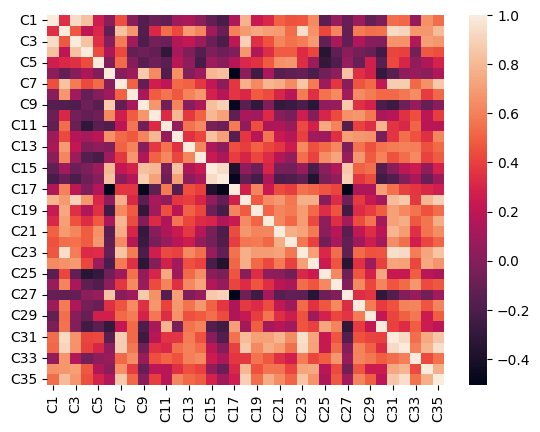

In [106]:
sns.heatmap(
    df_spots[targets].corr(method='spearman')
)

In [14]:
img_width = 224
img_height = 224
def make_img_proc_info(df, img_with, img_height):
    return df.assign(
        left = lambda x: x['x'] - img_width // 2,
        right = lambda x: x['x'] + img_width // 2,
        top = lambda x: x['y'] - img_height // 2,
        bottom = lambda x: x['y'] + img_height // 2,
        lpad = lambda x: -(x['left'].where(x['left'] < 0, 0)),
        rpad = lambda x: -(2000 - x['right']).where(x['right'] > 2000, 0),
        tpad = lambda x: -(x['top'].where(x['top'] < 0, 0)),
        bpad = lambda x: -(2000 - x['bottom']).where(x['bottom'] > 2000, 0)
    ).assign(
        left = lambda x: x['left'].clip(0, 2000),
        right = lambda x: x['right'].clip(0, 2000),
        top = lambda x: x['top'].clip(0, 2000),
        bottom = lambda x: x['bottom'].clip(0, 2000),
    )
df_spots = make_img_proc_info(df_spots, img_width, img_height)
df_spots_test = make_img_proc_info(df_spots_test, img_width, img_height)

In [10]:
def create_tf_ds(df):
    if (pd.Series(targets).isin(df.columns)).all():
        return tf.data.Dataset.from_tensor_slices(
            ({
                i: df[i] for i in ['left', 'right', 'top', 'bottom', 'slide', 'lpad', 'rpad', 'tpad', 'bpad']
            }, np.log(df[targets]))
        )
    else:
        return tf.data.Dataset.from_tensor_slices({
            i: df[i] for i in ['left', 'right', 'top', 'bottom', 'slide', 'lpad', 'rpad', 'tpad', 'bpad']
        })

def proc_images(X):
    return tf.pad(
        images[X['slide'], X['left']:X['right'], X['top']:X['bottom'], :], 
        paddings = [(X['lpad'], X['rpad']), (X['tpad'], X['bpad']), (0, 0)],
        constant_values=1
    )

2025-03-28 08:28:34.615265: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


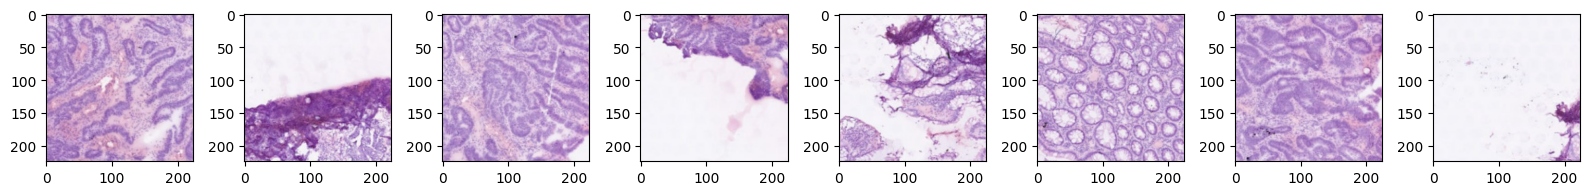

In [15]:
ds_train = create_tf_ds(df_spots)
fig, axes = plt.subplots(1, 8, figsize = (16, 3))
for X, Y in ds_train.map(lambda X, Y: (proc_images(X), Y)).batch(8).take(1):
    for i, ax in zip(range(8), axes.flatten()):
        ax.imshow(X[i])
plt.tight_layout()
plt.show()

2025-03-28 08:30:31.877083: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


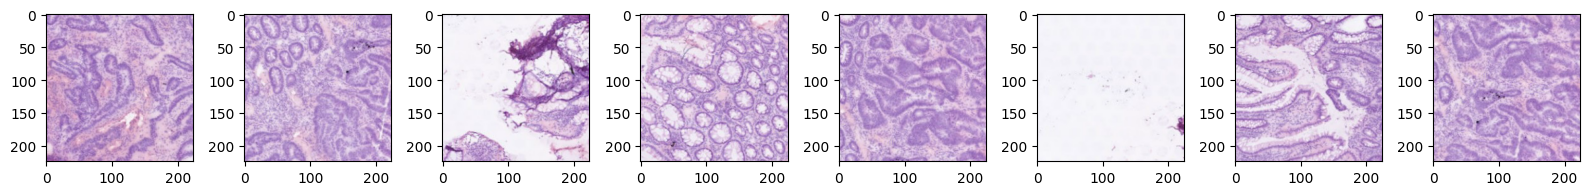

In [17]:
ds_test = create_tf_ds(df_spots_test)
fig, axes = plt.subplots(1, 8, figsize = (16, 3))
for X in ds_test.map(lambda X: proc_images(X)).batch(8).take(1):
    for i, ax in zip(range(8), axes.flatten()):
        ax.imshow(X[i])
plt.tight_layout()
plt.show()

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline

In [28]:
pca = make_pipeline(FunctionTransformer(np.log, np.exp), StandardScaler(), PCA()).fit(df_spots[targets])

In [31]:
pca[2].explained_variance_ratio_.cumsum()

array([0.42239715, 0.62036638, 0.77264709, 0.82435642, 0.85056208,
       0.86361118, 0.87471857, 0.88479577, 0.8940119 , 0.90256851,
       0.91083795, 0.91866332, 0.92578346, 0.93274221, 0.93946377,
       0.94600765, 0.95218057, 0.95817505, 0.96382314, 0.96855476,
       0.97271364, 0.9767286 , 0.98037405, 0.98384817, 0.98696858,
       0.98949295, 0.99173366, 0.99380124, 0.99554129, 0.99669951,
       0.9977709 , 0.99854623, 0.99914486, 0.99962693, 1.        ])

In [32]:
pca = make_pipeline(FunctionTransformer(lambda x: x.rank(axis=1)), StandardScaler(), PCA()).fit(df_spots[targets])

In [33]:
pca[2].explained_variance_ratio_.cumsum()

array([0.27533792, 0.47180551, 0.57389312, 0.64020603, 0.68519178,
       0.71060842, 0.73489113, 0.75648931, 0.77702871, 0.79616947,
       0.81199089, 0.82704425, 0.84141627, 0.85569882, 0.86912545,
       0.88215828, 0.89475906, 0.90581923, 0.91621436, 0.92568098,
       0.93404057, 0.94212513, 0.9493827 , 0.9564844 , 0.96292953,
       0.96900126, 0.97431666, 0.97940101, 0.98374311, 0.98774926,
       0.99150203, 0.99471255, 0.99790277, 1.        , 1.        ])

In [47]:
pca = make_pipeline(FunctionTransformer(np.log, np.exp), PCA()).fit(df_spots[targets])

In [49]:
pca[1].explained_variance_ratio_.cumsum()

array([0.31920141, 0.57185765, 0.75497917, 0.81041003, 0.84296085,
       0.85750425, 0.87078326, 0.88240321, 0.89314138, 0.90316256,
       0.91251037, 0.92147904, 0.92957871, 0.93743067, 0.94492842,
       0.95170958, 0.95829645, 0.96450297, 0.97008957, 0.97504914,
       0.97948971, 0.98342784, 0.98704955, 0.99043907, 0.99339935,
       0.99531193, 0.99645174, 0.99740829, 0.99824842, 0.99897297,
       0.99926383, 0.99953621, 0.99974939, 0.99990194, 1.        ])